In [1]:
import sys
sys.path.append('C:\\Users\\Hannah\\Desktop\\SLAC\\squat2\\Measurements\\RS_VNA')

import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from VNA_funcs import *

# Import the data

Currently looking at data from the R&S VNA.  Data format isn't great, but it's good enough for now.

Data is stored in dictionaries in ``npz`` files. 

Dictionary elements are:

| Key | Datatype | Description | 
| --- | -------- | ----------- |
| ``series``   | string | Timestamp of beginning of data acquisition |
| ``amps``     | numpy array | Transmission amplitude in dB |
| ``phases``   | numpy array | Transmission phase, raw/wrapped data from VNA |
| ``freqs`` | numpy array | Frequency points of scan |
| ``vna_power`` | float | power output of VNA |
| ``power_at_device`` | float | user recorded power at device, accounting for warm and cold added attenuation |
| ``bandwidth`` | float | IFBW [Hz] |
| ``averages`` | int | Number of averages  |
| ``nb_points`` | int | Number of points in the scan |

Folder contains 2010 scans taken from 20240327_181725 to 20240330_131646


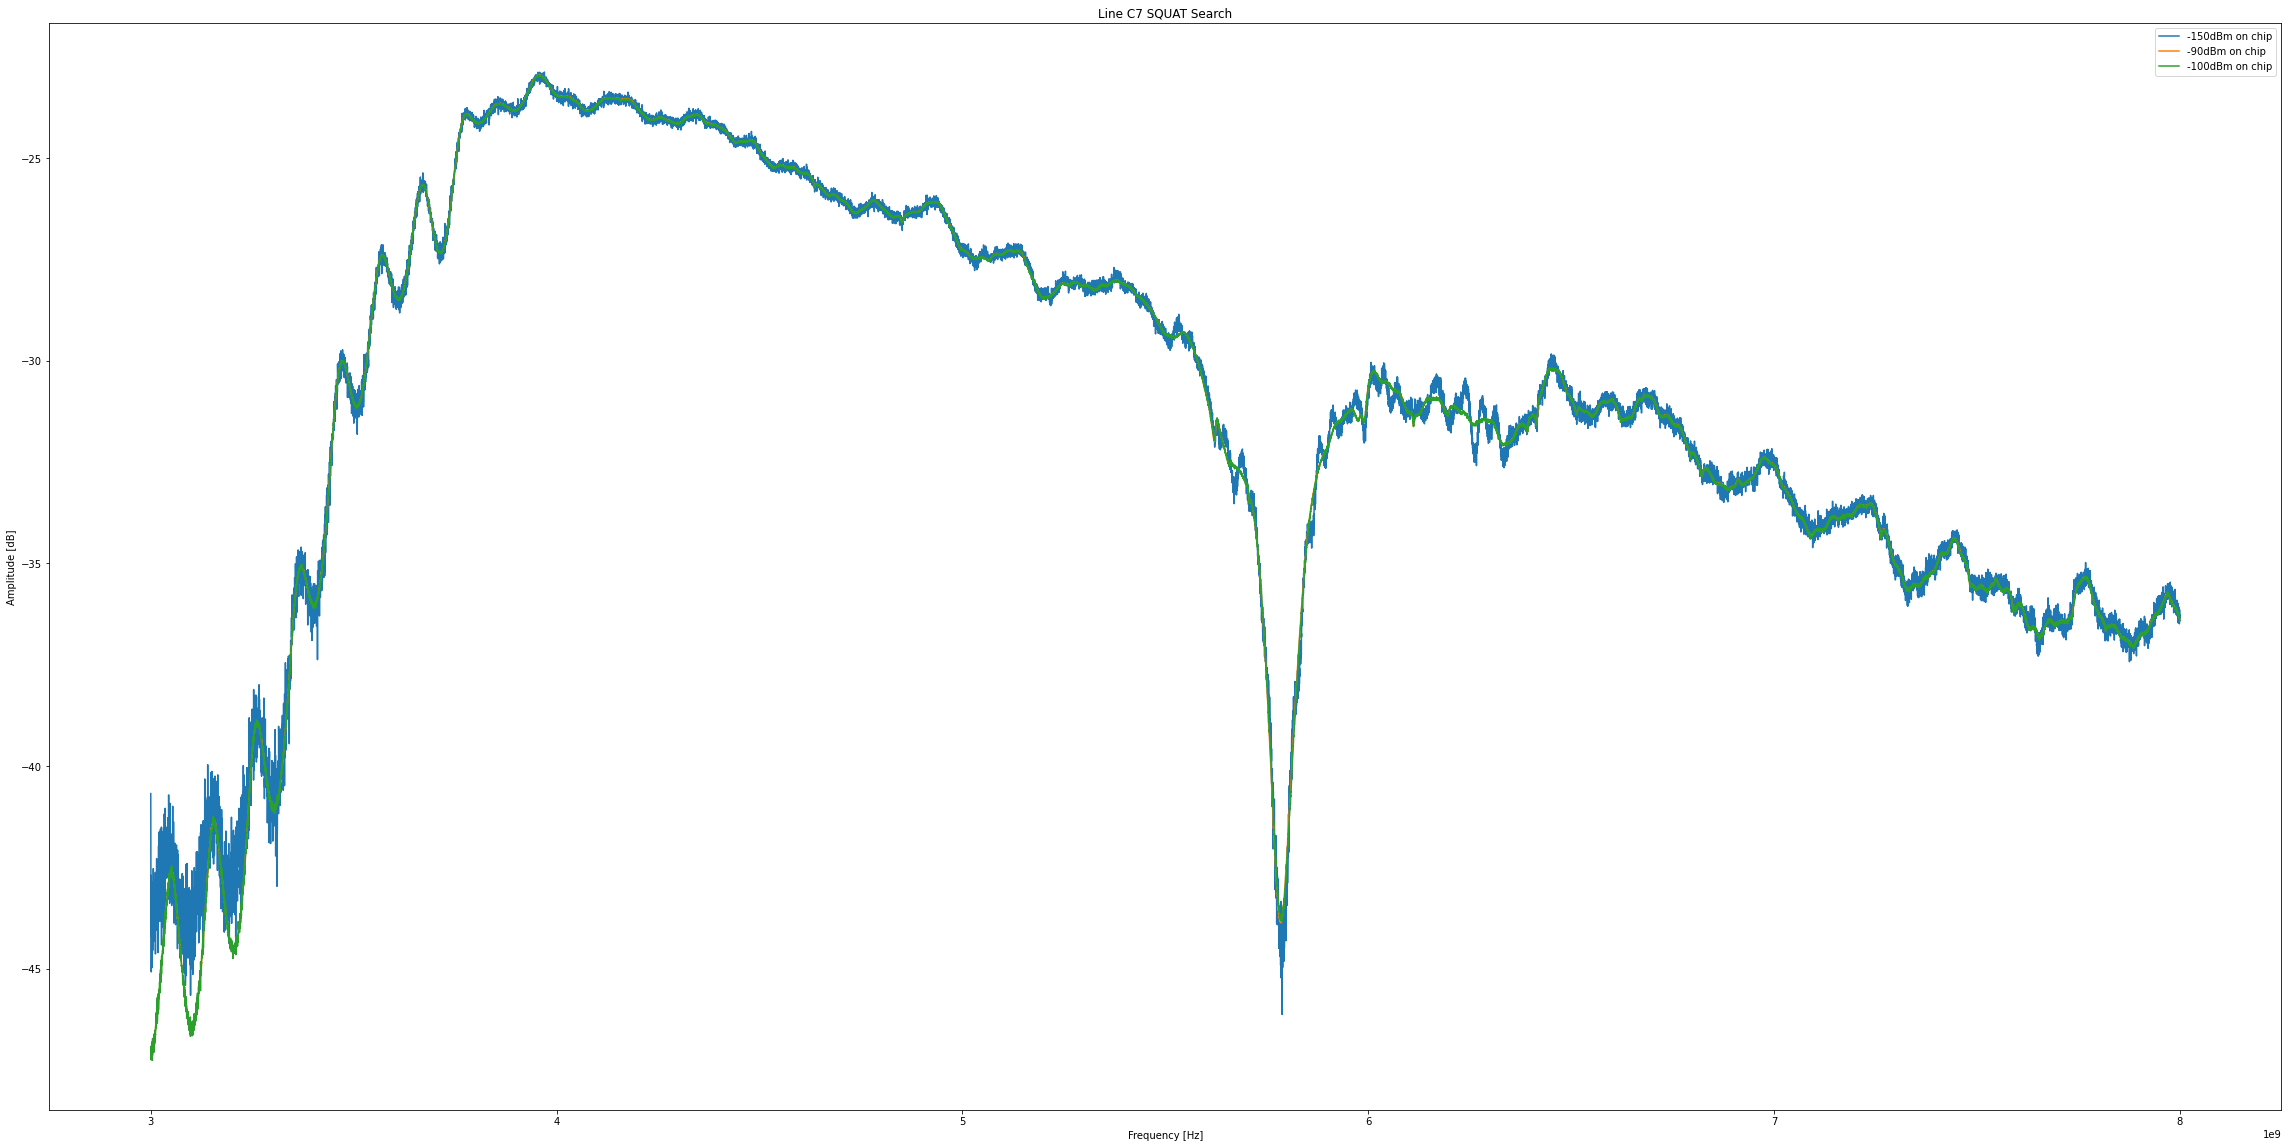

Calculated line delay: -2.7448370887817237e-08


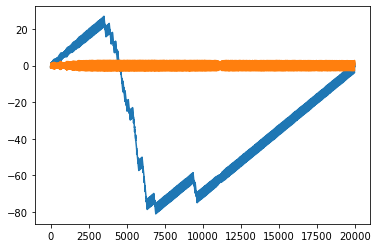

In [11]:
## Filepaths for low power ("lp") and high power ("hp") data
lp_fp = 'C:\\Users\\Hannah\\Desktop\\SLAC\\squat2\\Data\\20240330_Noshin_C7_low_power'
hp_fp = 'C:\\Users\\Hannah\\Desktop\\SLAC\\squat2\\Data\\20240330_Noshin_C7'
hp_fn = '20240330_133853_high_power_C7.npz'
mp_fn = '20240330_135349_medium_power_C7.npz'

## Average low power scans into a single dataset
lp = average_folder_of_scans(lp_fp)
hp = read_file(hp_fp, hp_fn)
mp = read_file(hp_fp, mp_fn)


## Plot amplitudes of Noshin's data
plt.figure(figsize=(40,20))
plt.plot(lp['freqs'], lp['amps'], label = f"{lp['power_at_device']}dBm on chip")
plt.plot(hp['freqs'], hp['amps'], label = f"{hp['power_at_device']}dBm on chip")
plt.plot(mp['freqs'], mp['amps'], label = f"{mp['power_at_device']}dBm on chip")
#plt.axvline(6.26e9)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.title(f"Line C7 SQUAT Search")
plt.legend()
plt.show()


## Why does phase look so bad??
lp_phases, line_delay = unwrap_phases(lp)
plt.plot(lp_phases)
plt.plot(lp['phases'])

In [13]:

def plot_datasets_in_chunks(scans, nplots=5):
    datalen = len(scans[i]['freqs'])
    chunksize = datalen // nplots

    for i in range(0, nplots):
        plt.figure(figsize=(40,20))
        for scan in range(scans):
            plt.plot(scans[scan]['freqs'][i*chunksize:(i+1)*chunksize], scans[scan]['amps'][i*chunksize:(i+1)*chunksize], label = f"{scans[i]['power_at_device']}dBm on chip")
        plt.xlabel('Frequency [Hz]')
        plt.ylabel('Amplitude [dB]')
        plt.title(f"Line C7 SQUAT Search")
        plt.legend()
        plt.show()
    
plot_datasets_in_chunks([lp, hp, mp], nplots=5)


UnboundLocalError: local variable 'i' referenced before assignment